# Anaysis On House Price Data


In [13]:
# import numpy 
import numpy as np

#import pandas
import pandas as pd 

# import seaborn
import seaborn as sns

# import matplotplib
import matplotlib.pyplot as plt

In [14]:
# import the data set 
df_house_price_data = pd.read_csv("C:\\Users\\Admin\\Downloads\\House_Price.csv")

In [15]:
# show 1st five observations of the dataset
df_house_price_data.head()

In [16]:
# show las tfive obs of the dataset 
df_house_price_data.tail()

# 1 Data Overview 

In [17]:
# show the attributes names 
df_house_price_data.columns

**columninfo**
 - `price` : price of the house.
 - `crime_rate` : crime rate in that area.

## basic Statistics(descriptive statistics)

In [18]:
# shape of the data
# Basic info
# Basic Description 

In [19]:
# shape of the data
df_house_price_data.shape 

**Interpretetion**
we have 506 obs and 19 attributes

In [20]:
# Basic info 
df_house_price_data.info()

**Interpretation**
  - we have 16 numerical attributes it includes 15 floats and 1 integer in nature  
  - we have 3 catagorical attributes 
  - in the data we have valid null values

In [21]:
# Basic Description  
df_house_price_data.describe().T

**interpretation**
 - we have outlier in `crime_rate` , `resid_area`,`age`

# 2 Data preprocessing 

In [22]:
# Data cleaning 
# Null Value Handlng
# Outlier treatment


### Data Cleaning

In [23]:
df_house_price_data.columns

In [24]:
# lets renme the columns 
df_house_price_data.rename (columns={'rice':`Price`})

In [25]:
df_house_price_data = df_house_price_data.rename (columns={'price' : 'Price' , 'crime_rate' : 'Crime_Rate' ,'resid_area' : 'Resid_Area' , 'air_qual' : 'Air_Quality','room_num' : 'Room_No' ,'age' : 'Age' , 'dist1' : 'Dist1' , 'dist2' : 'Dist2' , 'dist3' : 'Dist3'  , 'dist4' : 'Dist4', 'teachers' : 'Teachers' ,'poor_prop' : 'Poor_Prop'})

In [26]:
df_house_price_data.head()

In [27]:
df_house_price_data = df_house_price_data.rename (columns={'price' : 'Price' , 'crime_rate' : 'Crime_Rate' ,'resid_area' : 'Resid_Area' , 'air_qual' : 'Air_Quality','room_num' : 'Room_No' ,'age' : 'Age' , 'dist1' : 'Dist1' , 'dist2' : 'Dist2' , 'dist3' : 'Dist3'  , 'dist4' : 'Dist4', 'teachers' : 'Teachers' ,'poor_prop' : 'Poor_Prop','airport' : 'Airports','n_hos_beds' : 'N_Hos_Beds','n_hos_rooms' : 'N_Hos_Rooms','warerbody' : 'Waterbody', 'rainfall' : 'Rainfall', 'bus_ter': 'Bus_Ter','parks':'Parks'})

In [28]:
df_house_price_data.head()

In [29]:
df_house_price_data.head()

In [30]:
df_house_price_data.head()


In [31]:
df_house_price_data.head()


In [32]:
# lets do the typecasting here
# Room_No 
# Age,
# Teachers
# N_Hos_Beds
# n_hot_rooms




In [33]:
df_house_price_data['Room_No'] = df_house_price_data['Room_No'].astype('object')

In [34]:
df_house_price_data['Teachers'] = df_house_price_data['Teachers'].astype('float')

In [35]:
df_house_price_data.info()


In [36]:
df_house_price_data['Age'] = df_house_price_data['Age'].astype('int')

In [37]:
# df_house_price_data['N_Hos_Beds'] = df_house_price_data['N_Hos_Beds'].astype('int')

In [38]:
# in previous we did the typecasting based on observations and domain expertise 
#Now the time is for data visualisation 

df_house_price_data.hist()
plt.tight_layout()
plt.show()


In [39]:
df_house_price_data.Price.plot(kind = 'kde')
plt.show()

In [40]:
df_house_price_data.Room_No.plot(kind = 'kde')
plt.show()

In [41]:
# Room_No
# n_hot_rooms 
df_house_price_data.n_hot_rooms.plot(kind = 'kde')
plt.show()

In [42]:
df_house_price_data.Room_No.hist(color = 'black')
plt.show()


In [43]:
df_house_price_data.n_hot_rooms.hist(color = 'Purple')
plt.show()

In [44]:
df_house_price_data['Room_No'] = df_house_price_data['Room_No'].astype('object')

In [45]:
df_house_price_data.info()

### Null value handling 


In [46]:
df_house_price_data.head()

In [47]:
# Find the number of missing values 
df_house_price_data.isnull().sum()

In [48]:
df_house_price_data.info()

In [49]:
# laws 
# when we have less than 10% data is missing , remove the observations  
# whe nwe have missing values percentage missing between 30 to 70 percent then we nedd to impute the missing values
# when we have more than 80% data is missing , remove the attribute


In [50]:
round(df_house_price_data.isnull().sum()/len(df_house_price_data)*100,2)

In [51]:
# we have less than 2% data is missing from hospital bed , lets remove the obs 
df_house_price_data.dropna(inplace = True)

In [52]:
df_house_price_data.isnull().sum()

 ### Outlier detection & treatment

In [53]:
df_house_price_data.plot(kind = 'box')
plt.xticks(rotation = 90)
plt.title('Outlier Detection')
plt.show();

In [54]:
df_num = df_house_price_data.select_dtypes(np.number)

In [55]:
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3 - q1
df_num = df_num[(df_num >= q1 - 1.5 * iqr)& (df_num <= q3 + 1.5 * iqr)]


In [56]:
df_num = df_num.reset_index()

In [57]:
df_num.plot(kind = 'box')
plt.show()

In [58]:
# concate the treated data frame with categorical dataframe
df_cat = df_house_price_data.select_dtypes('object')


In [59]:
df_cat = df_cat.reset_index()

In [60]:
print(df_num.shape)
print(df_cat.shape)

In [61]:
# concade both 
df_house_price_data = pd.concat((df_num,df_cat) , axis = 1)
df_house_price_data.shape

In [62]:
# checking null values
df_house_price_data.isnull().sum()

In [63]:
df_house_price_data.dropna(inplace = True)

In [64]:
# checking null values
df_house_price_data.isnull().sum()

# 3EDA 

In [65]:
# univariate analysis
# bivariate analysis 
# multivariate analysis


### Univariate Analysis


In [66]:
# lets segrigate numerical columns and the catagorical columns 
df_num = df_house_price_data.select_dtypes(include = np.number)

In [67]:
df_num.head()

In [68]:
# catogorical data frame
df_cat = df_house_price_data.select_dtypes(include = ['object'] )

In [69]:
df_cat.head()

#### Room_Number

In [70]:
#Find the count of each categary present in that column
df_cat.Room_No.value_counts()

In [71]:
# visualise the count 
df_cat.Room_No.value_counts().plot(kind = 'bar')
plt.show()

**Interpretation**
 - We have imbalance data in room number column 
 - 6 is a category who is dominationg the most, Its count is 266
 - 3 is a cateory who has least number of observation ,Its count is 2

#### Airports 

In [72]:
# find the value count for airport column
df_cat.Airports.value_counts()

In [73]:
# plot the value count
df_cat.Airports.value_counts().plot(kind = 'bar' , color = 'black' )
plt.show()

***Interpretation***
 - we have balanced data in this airport columns 
 - in the data there is 273 places where airport is present and there are 225 places where it is not present
 

In [74]:
df_cat.head(2)

# waterbody

In [75]:
# find the value count for waterbody column
df_cat.waterbody.value_counts()

In [76]:
# visualise the count

df_cat.waterbody.value_counts().plot(kind = 'bar', color = 'black')
plt.title('Count of waterbody')
plt.ylabel('count')
plt.xlabel('Waterbodies')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

***Interpretation***
 - Most of the places having river as waterbody 178 where 
 - There is few places where lake and river are the waterbody  
 - this data is also imbalanced 

In [77]:
df_cat.head()

# Bus terminal

In [78]:
# find the value count for waterbody column
df_cat.Bus_Ter.value_counts()

In [79]:
# visualise the count

df_cat.Bus_Ter.value_counts().plot(kind = 'bar', color = 'black')
plt.title("bus terminal")

plt.show()

***Interpretation***
 - All the places we have contained the bus terminal 
 - ACTION: remove that column from the data 

In [80]:
# Drop the column 
df_house_price_data.drop('Teachers' , axis = 1 , inplace = True )


In [81]:
df_house_price_data.shape

In [82]:
df_house_price_data.shape[1]

In [83]:
df_house_price_data.head()

In [84]:


df_house_price_data.head()

## univariate on numerical data 


In [85]:
df_num.head()

#### Price 

In [86]:
df_num.Price.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on price')
plt.grid()
plt.show()

In [87]:
# Find the minimum value 
df_num.Price.min()

In [88]:
df_num.Price.max()

In [89]:
#Find the avg value
df_num.Price.mean()

***Interpretation***
 - This data is slightly normally distributed 
 - The houses we have there prices lie between 8 lacs to 40 lacs
 - The house we have with least price is 5 lacs
 - The house with max price is 50 lacs
 - Avg price of houses is 22 lacs 75 thousand

In [90]:
df_num.head()

### Crime Rate 

In [91]:
# Find the minimum value 
df_num.Crime_Rate.min()

In [92]:
df_num.Crime_Rate.max()

In [93]:
#Find the avg value
df_num.Crime_Rate.mean()

In [94]:
df_num.Crime_Rate.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Crime_rate')
plt.grid()
plt.show()

***Interpretation***
 - The min Crime rate is 5
 - The max Crime rate is 88.97
 - The avg Crime rate is 3.588967791164659
 - The houses we have there prices lie between 5 to 9
 

### Resid Area 

In [95]:
# Find the minimum value 
df_num.Resid_Area.min()

In [96]:
df_num.Resid_Area.max()

In [97]:
#Find the avg value
df_num.Resid_Area.mean()

In [98]:
df_num.Resid_Area.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Residential area')
plt.grid()
plt.show()

***Interpretation***
 - The min Resid_Area is 30.67
 - The max Resid_Area is 57.74
 - The avg Resid_Area is 41.12652610441768
 - The houses we have there prices lie between 30 to 57
 - It is a multi graph 
 

In [99]:
df_num.head()

### Air Quality

In [100]:
# Find the minimum value 
df_num.Air_Quality.min()

In [101]:
df_num.Air_Quality.max()

In [102]:
df_num.Air_Quality.mean()

In [103]:
df_num.Air_Quality.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Air Quality')
plt.grid()
plt.show()

***Interpretation***
 - The min Resid_Area is 0.385
 - The max Resid_Area is 0.871
 - The avg Resid_Area is 0.5538688755020079
 - The houses we have there prices lie between 0.3 to 0.8 and means value is 0.6

### Age

In [104]:
# Find the minimum value 
df_num.Age.min()

In [105]:
df_num.Age.max()

In [106]:
df_num.Age.mean()

In [197]:
df_num.Age.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Age')
plt.grid()
plt.show()

***Interpretation***
 - The min Age is 2 years 
 - The max Age is 100 years 
 - The avg Age is 68 years
 - The Age we have there prices lie between 2 years to 100 Years and the avg value is 68 years

In [108]:
df_num.head()

### Dist1

In [109]:
# Find the minimum value 
df_num.Dist1.min()

In [110]:
df_num.Dist1.max()

In [111]:
df_num.Dist1.mean()

In [112]:
df_num.Dist1.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Dist1')
plt.grid()
plt.show()

***Interpretation***
 - The min Dist1 is 1.13
 - The max Dist1 is 12.32
 - The avg Dist1 is 3.9852208835341365
 - The Dist1 we have there lie between 2 to 8 and the avg value is 4 

### Dist2

In [113]:
# Find the minimum value 
df_num.Dist2.min()

In [114]:
df_num.Dist2.max()

In [115]:
df_num.Dist2.mean()

In [116]:
df_num.Dist2.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Dist2')
plt.grid()
plt.show()

***Interpretation***
 - The min Dist2 is 0.92
 - The max Dist2 is 11.93
 - The avg Dist2 is 3.641987951807229
 - The Dist2 we have there lie between 2 to 8 and the avg value is 4 


### Dist 3

In [117]:
# Find the minimum value 
df_num.Dist3.min()

In [118]:
df_num.Dist3.max()

In [119]:
df_num.Dist3.mean()

In [120]:
df_num.Dist3.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Dist3')
plt.grid()
plt.show()

***Interpretation***
 - The min value Dist3 is 1.15
 - The max value Dist3  is 12.32
 - The avg value Dist3 is 3.98
 - The Dist3 we have there lie between 2 to 8.5 and the avg value is 4 


In [121]:
df_num.head()


### Teachers

In [122]:
# Find the minimum value 
df_num.Teachers.min()

In [123]:
df_num.Teachers.max()

In [124]:
df_num.Teachers.mean()

In [125]:
df_num.Teachers.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Teachers')
plt.grid()
plt.show()

***Interpretation***
 - The min value Teachers is 18
 - The max value Teachers  is 27.82
 - The avg value Teachers is 21.58
 - The Teachers we have there lie between 18 to 27 and the avg value is 21.6


### Poor Prop

In [126]:
# Find the minimum value 
df_num.Poor_Prop.min()

In [127]:
df_num.Poor_Prop.max()

In [128]:
df_num.Poor_Prop.mean()

In [129]:
df_num.Poor_Prop.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on  Poor Prop')
plt.grid()
plt.show()

***Interpretation***
 - The min value of Poor Prop is 1.73
 - The max value of Poor Prop  is 37.97
 - The avg value of Poor Prop is 12.59
 - The  Poor Prop we have there lie between 2 to 28 and the avg value is 12.6


In [130]:
df_num.head()

### Number of hospital Beds

In [131]:
# Find the minimum value 
df_num.N_Hos_Beds.min()

In [132]:
df_num.N_Hos_Beds.max()

In [133]:
df_num.N_Hos_Beds.mean()

In [134]:
df_num.N_Hos_Beds.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Hospital Beds')
plt.grid()
plt.show()

***Interpretation***
 - The min value of Hospital bed is 5.268
 - The max value of Hospital bed is 10.876
 - The avg value of Hospital bed is 7.899767068273092
 - The Hospital bed we have there lie between 5 to 11.5 and the avg value is 7.9


In [135]:
df_num.head()

### number of hotel rooms

In [136]:
# Find the minimum value 
df_num.n_hot_rooms.min()

In [137]:
df_num.n_hot_rooms.max()

In [138]:
df_num.n_hot_rooms.mean()

In [139]:
df_num.n_hot_rooms.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on hotel rooms')
plt.grid()
plt.show()

***Interpretation***
 - The min value of Hotel rooms is 10
 - The max value of Hotel rooms is 101.12
 - The avg value of Hotel rooms is 13.048
 - The Hotel rooms we have there lie between 2 to 23 and the avg value is 13


### Rainfall

In [140]:
# Find the minimum value 
df_num.Rainfall.min()

In [141]:
df_num.Rainfall.max()

In [142]:
df_num.Rainfall.mean()

In [143]:
df_num.Rainfall.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on hotel rooms')
plt.grid()
plt.show()

***Interpretation***
 - The min value of Rainfall is 3
 - The max value of Rainfall is 60
 - The avg value of Rainfall is 39.3
 - The Rainfall we have there lie between 10 to 65 and the avg value is 39


In [144]:
df_num.head()

### Parks

In [145]:
# Find the minimum value 
df_num.Parks.min()

In [146]:
df_num.Parks.max()

In [147]:
df_num.Parks.mean()

In [148]:
df_num.Parks.plot(kind = 'kde', color = 'black')
plt.title('KDE plot on Parks')
plt.grid()
plt.show()

***Interpretation***
 - The min value of Parks is 0.03329
 - The max value of Parks is 0.087
 - The avg value of Parks is 0.05436170961044177
 - The Parks we have there lie between 0.03 to 0.09 and the avg value is 0.05
 - It is a normally distributed balanced graph


In [149]:
df_house_price_data.head()

## Bivariate Analysis


In [150]:
# step 1: Do the bivariate analysis for numerical variables
# Find the corelation
df_num.corr()

In [151]:
# Draw the heat map  for corelation 
sns.heatmap(df_num.corr(),annot = True )
sns.set(rc = 

In [152]:
ax = plt.subplots(figsize=(15, 5))

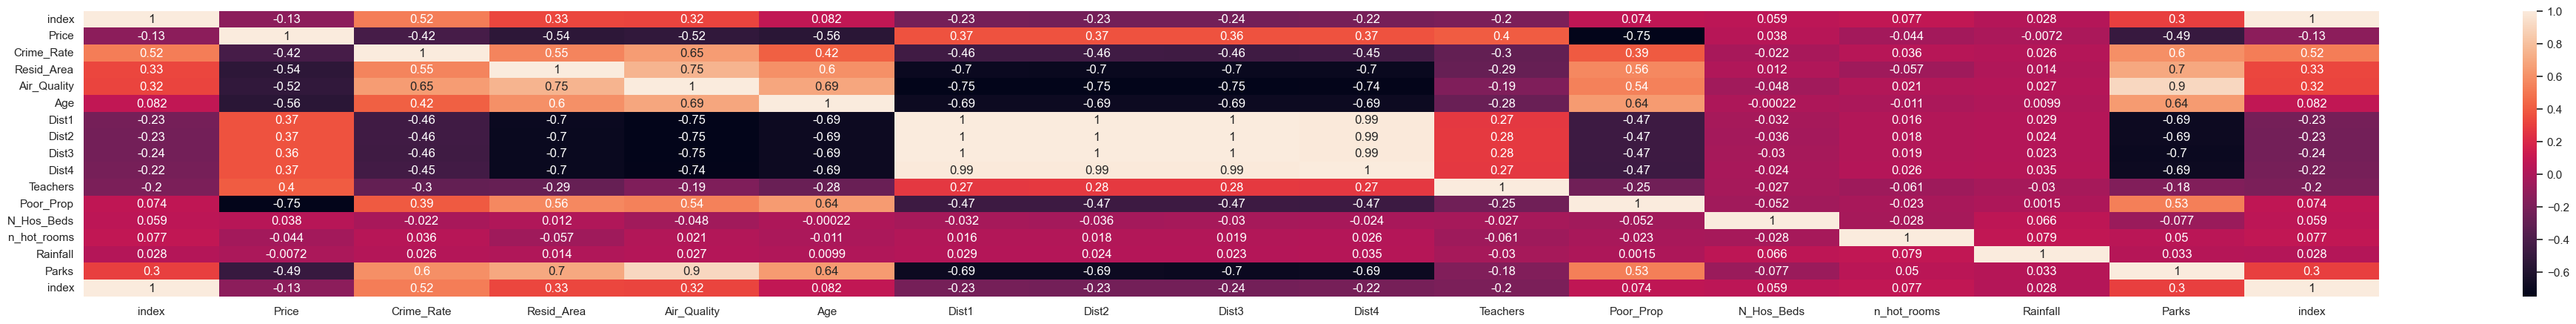

In [204]:
ax = sns.heatmap(df_num.corr(),annot = True )
sns.set(rc ={'figure.figsize':(10,10)})

In [154]:
#price-poor_prop
# price-park
#poorprop-dist1
#dist1-parks
#dist2-parks
#dist3-parks
#dist4-parks
#dist1-poor_prop
#dist2-poor_prop
#dist3-poor_prop
#dis4-poor_prop



### price-parks

In [155]:
sns.scatterplot(x='Parks',y="Price",data=df_num)
plt.xlabel("parks")
plt.ylabel("price")
plt.title("coreltion between parks and price", fontsize=30)

plt.show()

***Interpretation***
 - this is a side negative corealtion
 - we can say that if the poor population is higher than the price is lesser


### price-poor_prop

In [156]:
sns.scatterplot(x='Price',y="Poor_Prop",data=df_num)
plt.xlabel("Price")
plt.ylabel("Poor prop")
plt.title("coreltion between price and poor properties", fontsize=30)

plt.show()

***Interpretation***
 - this is a side negative corealtion
 - we can say that if the poor population is higher than the price is lesser


### dist1-parks

In [157]:
sns.scatterplot(x='Dist1',y="Parks",data=df_num)
plt.xlabel("Dist1")
plt.ylabel("Parks")
plt.title("coreltion between Distance 1 and Parks", fontsize=30)

plt.show()

 ***Interpretation***
 - this is a side negative corealtion
 - we can say that if the park is higher than the dist1 is lesser


### dist2-parks

In [158]:
sns.scatterplot(x='Dist2',y="Parks",data=df_num)
plt.xlabel("Dist2")
plt.ylabel("Parks")
plt.title("coreltion between Distance 2 and Parks", fontsize=30)

plt.show()

***Interpretation***
 - this is a side negative corealtion
 - we can say that if the park is higher than the dist2 is lesser


### dist3-parks

In [159]:
sns.scatterplot(x='Dist3',y="Parks",data=df_num)
plt.xlabel("Dist3")
plt.ylabel("Parks")
plt.title("coreltion between Distance 3 and Parks", fontsize=30)

plt.show()

***Interpretation***
 - this is a side negative corealtion
 - we can say that if the park is higher than the dist3 is lesser


### dist4-parks

In [160]:
sns.scatterplot(x='Dist4',y="Parks",data=df_num)
plt.xlabel("Dist4")
plt.ylabel("Parks")
plt.title("coreltion between Distance 4 and Parks", fontsize=30)

plt.show()

***Interpretation***
 - this is a side negative corealtion
 - we can say that if the park is higher than the dist4 is lesser


### dist1-poor_prop

In [161]:
sns.scatterplot(x='Dist1',y="Poor_Prop",data=df_num)
plt.xlabel("Dist1")
plt.ylabel("poor_prop")
plt.title("coreltion between Distance 1 and poor population", fontsize=30)

plt.show()

***Interpretation***
 - In the data there is heteroscedasticity is present

In [162]:
### dist2-poor_prop


In [163]:
sns.scatterplot(x='Dist2',y="Poor_Prop",data=df_num)
plt.xlabel("Dist2")
plt.ylabel("poor_prop")
plt.title("coreltion between Distance 2 and poor population", fontsize=30)

plt.show()

***Interpretation***
 - In the data there is heteroscedasticity is present

In [164]:
### dist3-poor_prop


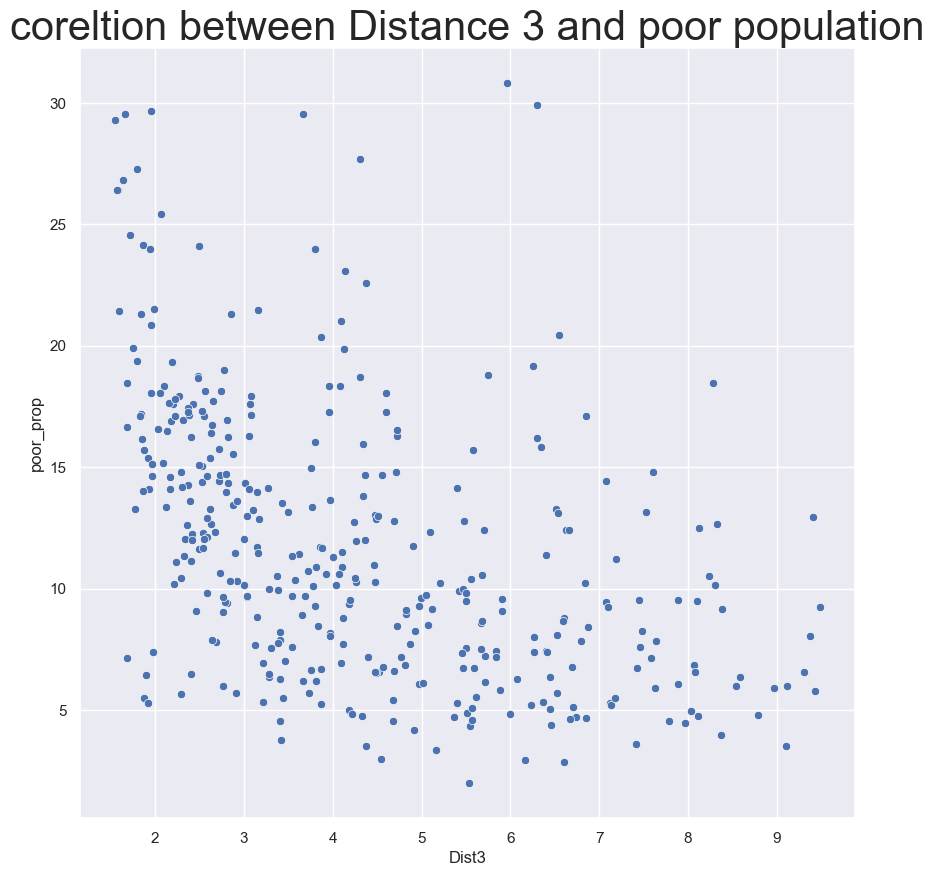

In [205]:
sns.scatterplot(x='Dist3',y="Poor_Prop",data=df_num)
plt.xlabel("Dist3")
plt.ylabel("poor_prop")
plt.title("coreltion between Distance 3 and poor population", fontsize=30)

plt.show()

***Interpretation***
 - In the data there is heteroscedasticity is present

In [166]:
### dist4-poor_prop


In [167]:
sns.scatterplot(x='Dist4',y="Poor_Prop",data=df_num)
plt.xlabel("Dist4")
plt.ylabel("poor_prop")
plt.title("coreltion between Distance 3 and poor population", fontsize=30)

plt.show()

***Interpretation***
 - In the data there is heteroscedasticity is present

In [168]:
sns.pairplot(df_num)

In [ ]:
# parks
# price 
# poor_population
# air quality 

In [ ]:
df_cat.head()

In [ ]:
x= 'Room_No'
y= 'Parks'
height=1
plt.bar(x,height=y,data=df_house_price_data)

# plt.bar(x,y,data = df_house_price_data ,height,width)
# plt.bar(x, y,data = df_house_price_data ,height,width=0.8,)


In [169]:
sns.barplot(x='Room_No',y='Parks',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - If avg number of parks is high then the number of room number is less
 - if avg number of parks is lesser than number of rooms is 7

In [170]:
sns.barplot(x='Room_No',y='Price',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - when the number of room is 7 then prices are high 
 - when the number of rooms is 4 than the price is lowest

In [171]:
sns.barplot(x='Room_No',y='Poor_Prop',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - when the number of poor population is high  then room numbers are low,the houses we have over there number of rooms is 4
 - if we have 8 number of rooms in a house than the proportion f poor population is low

In [172]:
sns.barplot(x='Room_No',y='Air_Quality',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - when the Airquality is best in the area that time the avg room number is 4 in the house 
 - when we have the bad air quality in the area than the avg room number is 7 

In [173]:
sns.barplot(x='Airports',y='Parks',data=df_house_price_data)
plt.show()

In [174]:
***InterpretatioN***
 - Nothing special

In [ ]:
sns.barplot(x='Airports',y='Price',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - Nothing special

In [ ]:
sns.barplot(x='Airports',y='Poor_Prop',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - Nothing special

In [ ]:
sns.barplot(x='Airports',y='Air_Quality',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - Nothing special

In [ ]:

sns.barplot(x='waterbody',y='Parks',data=df_house_price_data)
plt.show()


 ***InterpretatioN***
 - Nothing special

In [ ]:

sns.barplot(x='waterbody',y='Price',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - Nothing special

In [ ]:

sns.barplot(x='waterbody',y='Poor_Prop',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - Nothing special

In [ ]:

sns.barplot(x='waterbody',y='Air_Quality',data=df_house_price_data)
plt.show()

***InterpretatioN***
 - Nothing special

### Multivariate Analysis

In [ ]:
# add hue
# cross tab :Cross tabulation is used to compare categorical variables. It allows researchers to summarize large sets of data quickly and efficiently. It also makes it easier to understand trends in data.
# Pivot table


In [ ]:
# pairs
# col1 : price , col2 : parks , col3: Room number
# col1 : price , col2 : air quality , col3: Room number
# col1 : price , col2 : poor prop , col3: Room number

# col1 : price , col2 : parks , col3: airport
# col1 : price , col2 : air quality , col3: airport
# col1 : price , col2 : poor prop, col3: airport

# col1 : price , col2 : parks , col3: water body
# col1 : price , col2 : air quality , col3: water body
# col1 : price , col2 : poor prop, col3: water body

# note : my col 3 should be hue parameter




In [175]:
df_house_price_data.columns

#### col1 : price , col2 : parks , col3: Room number


In [176]:
sns.scatterplot( x='Price',y='Air_Quality',hue='Room_No',data=df_house_price_data)
sns.set(rc ={'figure.figsize':(10,10)})
plt.show()

***Interpretation***
 - when no. of parks is high (0.08) that time the price is low(15 lacs) the avg no. of rooms in that scenerio is 3
 
 - parks - when the number of parks is low (0.04) that time the price of the house is high (36 lacs) in that scenerio we have avg number of rooms is 8

#### col1 : price , col2 : air quality , col3: Room number


In [177]:
sns.scatterplot( x='Price',y='Air_Quality',hue='Room_No',data=df_house_price_data)
plt.show()

***Interpretation***
 - when no. of price is low (13 lacs) that time the Air quality is really good (0.9) the avg no. of rooms in that scenerio is 4
 - when no. of price is High (36 lacs) that time the Air quality is really bad(0.45) the avg no. of rooms in that scenerio is 8


### col1 : price , col2 : poor prop , col3: Room number


In [178]:
sns.scatterplot( x='Price',y='Poor_Prop',hue='Room_No',data=df_house_price_data)
plt.show()

***Interpretation***
 - when no. of price is loW (7 lacs) that time the Poor Population is 30 the avg no. of rooms in that scenerio is 4
 - when no. of price is High (36 lacs) that time the Poor Population is 4 and the avg no. of rooms in that scenerio is 8


### col1 : price , col2 : parks , col3: airport


In [179]:
sns.scatterplot( x='Price',y='Parks',hue='Airports',data=df_house_price_data)
plt.show()

In [180]:
***Interpretation***
 - when no. of price is loW (12 lacs) that time the parks  is  that time airport is present
 - when no. of price is High (37 lacs) that time the parks is 0.04 and thet time airport is present


### col1 : price , col2 : air quality , col3: airport


In [181]:
sns.scatterplot( x='Price',y='Air_Quality',hue='Airports',data=df_house_price_data)
plt.show()

***Interpretation***
 - when no. of price is loW (12 lacs) that time the air qualuty is high(0.9) and that time airport is present
 - when no. of price is High (37 lacs) that time the air quality is low (0.45) and thet time airport is present


### col1 : price , col2 : poor prop, col3: airport


In [182]:
sns.scatterplot( x='Price',y='Poor_Prop',hue='Airports',data=df_house_price_data)
plt.show()

***Interpretation***
 - when no. of price is loW (8 lacs) that time the poor popultion is high(28) and that time airport is present
 - when no. of price is High (37 lacs) that time the poor population  is low (3) and thet time airport is present


### col1 : price , col2 : parks , col3: water body


In [183]:
sns.scatterplot( x='Price',y='Parks',hue='waterbody',data=df_house_price_data)
plt.show()

In [184]:
***Interpretation***
 - when no. of price is loW (12 lacs)  that time the parks is high (0.08) and thet time river is present
 - when no. of price is High (37 lacs) that time the parks is low (0.055) and thet time river is present


### col1 : price , col2 : air quality , col3: water body



In [185]:
sns.scatterplot( x='Price',y='Air_Quality',hue='waterbody',data=df_house_price_data)
plt.show()

***Interpretation***
 - when no. of price is loW ( lacs)  that time the parks is high (0.89) and thet time lake is present
 - when no. of price is High (37 lacs) that time the aiir is low (0.45) and thet time river is present


### col1 : price , col2 : poor prop, col3: water body

In [186]:
sns.scatterplot( x='Price',y='Poor_Prop',hue='waterbody',data=df_house_price_data)
sns.set(rc ={'figure.figsize':(50,5)})
plt.show()

***Interpretation***
 - when no. of price is loW (6 lacs)  that time the parks is high (29) and thet time both lake and river is present
 - when no. of price is High (36 lacs) that time the poor population is low (3) and thet time lake is present


#### Arrangement for the pivot and cross table

In [187]:
# col1 :room ,col 2: Airoport col3: price
# col1 :room ,col 2: waterbody col3: price
# col1 :airport ,col 2: waterbody col3: price


### col1 :room ,col 2: Airport col3: price


In [188]:
df_house_price_data.columns

### Cross tab

In [209]:
pd.crosstab(df_house_price_data.Room_No, df_house_price_data.Airports,values=df_house_price_data.Price,aggfunc='mean' )

Airports,NO,YES
Room_No,,
3.561,NaN,27.5
4.903,NaN,11.8
4.926,14.6,NaN
4.963,21.9,NaN
4.973,16.1,NaN
...,...,...
7.412,NaN,31.7
7.416,33.2,NaN
7.420,NaN,33.4


In [208]:
pd.crosstab(df_house_price_data.Room_No, df_house_price_data.Airports,values=df_house_price_data.Price,aggfunc='mean' )

Airports,NO,YES
Room_No,,
3.561,NaN,27.5
4.903,NaN,11.8
4.926,14.6,NaN
4.963,21.9,NaN
4.973,16.1,NaN
...,...,...
7.412,NaN,31.7
7.416,33.2,NaN
7.420,NaN,33.4


### col1 :room ,col 2: waterbody col3: price


In [207]:
pd.crosstab(df_house_price_data.Room_No, df_house_price_data.waterbody,values=df_house_price_data.Price,aggfunc='mean' )

waterbody,Lake,Lake and River,None,River
Room_No,,,,
3.561,NaN,NaN,NaN,27.5
4.903,NaN,NaN,NaN,11.8
4.926,NaN,NaN,14.6,NaN
4.963,21.9,NaN,NaN,NaN
4.973,NaN,NaN,NaN,16.1
...,...,...,...,...
7.412,NaN,NaN,31.7,NaN
7.416,NaN,NaN,NaN,33.2
7.420,NaN,NaN,NaN,33.4


### col1 :airport ,col 2: waterbody col3: price


In [206]:
pd.crosstab(df_house_price_data.Airports, df_house_price_data.waterbody,values=df_house_price_data.Price,aggfunc='mean' )

waterbody,Lake,Lake and River,None,River
Airports,,,,
NO,21.385714,20.003226,20.655319,21.966154
YES,22.595238,22.695833,21.643077,22.924324


### Pivot table

In [199]:
df_house_price_data.columns

In [213]:
pd.pivot_table(data = df_house_price_data,index = 'Airports', columns = 'waterbody', values = 'Price',aggfunc='mean')

waterbody,Lake,Lake and River,None,River
Airports,,,,
NO,21.385714,20.003226,20.655319,21.966154
YES,22.595238,22.695833,21.643077,22.924324


In [214]:
df_house_price_data.shape

(376, 20)